Import numpy and pandas libraries

In [2]:
import numpy as np
import pandas as pd

Import visualization libraries

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

Read in the csv file as a dataframe called df

In [41]:
df = pd.read_csv('D:\VSCodium\911_new.csv')

Use .info() to find the information of the dataframe

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


Use .head() to get only the first 5 rows of the dataframe

In [43]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Get top 5 zip codes from the dataframe

In [44]:
df['zip'].value_counts().sort_values(ascending=False).head() 

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

Get the top 5 townships (twp) for 911 calls

In [45]:
df['twp'].value_counts().sort_values(ascending=False).head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

Get the number of unique title codes

In [46]:
df['title'].nunique()

148

In the titles column there are "Reasons/Departments" specified before the title code: EMS, Fire, and Traffic. 
Create a new column called "Reason" that contains this string value. 

If the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [47]:
df['Reason'] = df['title'].str.split(':').str[0]

Most common Reason for a 911 call based off of Reasons column

In [48]:
df['Reason'].value_counts().sort_values(ascending=False)

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

Use seaborn to create a countplot of 911 calls by Reason

<Axes: xlabel='Reason', ylabel='count'>

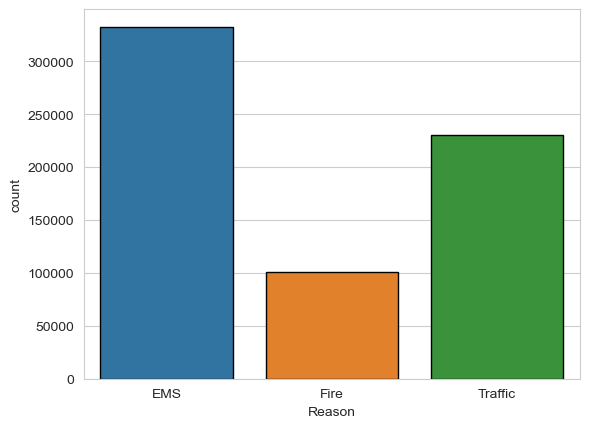

In [49]:
sns.countplot(x='Reason',data=df)

Get the datatype of timeStamp column

In [50]:
type(df['timeStamp'].iloc[0])

str

Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects

In [51]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
time = df['timeStamp'].iloc[0]
hour = time.hour
print(hour)

17


Use .apply() to create 3 new columns called Hour, Month, and Day of Week

In [65]:
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['Day of week'] = df['timeStamp'].apply(lambda x: x.weekday())

Use the .map() with this dictionary to map the actual string names to the day of the week:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [66]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of week'] = df['Day of week'].map(dmap) 

In [67]:
df.head(200) #get first 200 rows of the dataframe

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,40.189963,-75.535522,CHURCH ST & N 7TH AVE; ROYERSFORD; Station 32...,19468.0,EMS: UNRESPONSIVE SUBJECT,2015-12-11 09:06:33,ROYERSFORD,CHURCH ST & N 7TH AVE,1,EMS,9,12,Fri
196,40.286438,-75.263762,BETHLEHEM PIKE & HILLTOWN PIKE; HATFIELD TOWNS...,19440.0,Fire: GAS-ODOR/LEAK,2015-12-11 09:14:04,HATFIELD TOWNSHIP,BETHLEHEM PIKE & HILLTOWN PIKE,1,Fire,9,12,Fri
197,40.133533,-75.056460,CAMPUS DR & BUCK RD; BRYN ATHYN; 2015-12-11 @ ...,19009.0,Fire: FIRE ALARM,2015-12-11 09:29:49,BRYN ATHYN,CAMPUS DR & BUCK RD,1,Fire,9,12,Fri
198,40.119577,-75.062236,PHILMONT AVE & ANNE ST; LOWER MORELAND; 2015-1...,19006.0,Fire: FIRE ALARM,2015-12-11 09:32:05,LOWER MORELAND,PHILMONT AVE & ANNE ST,1,Fire,9,12,Fri


Used seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

In [68]:
sns.set_style("whitegrid" , rc={"patch.edgecolor": "black","patch.linewidth": 0.5})

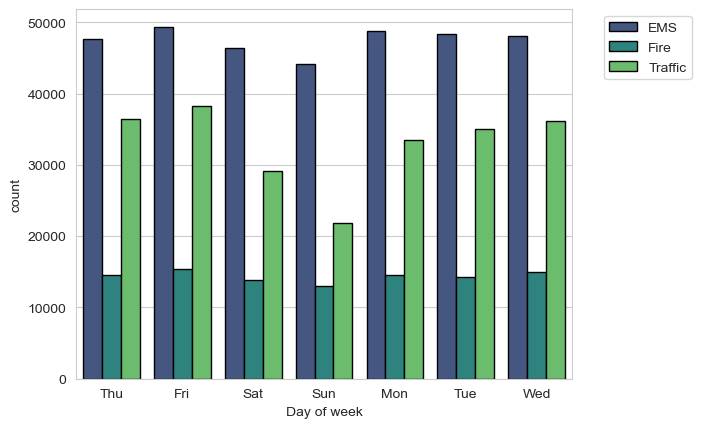

In [69]:
sns.countplot(x='Day of week', hue='Reason', data=df, palette= 'viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)

Used seaborn to create a countplot of the Month column with the hue based off of the Reason column.

<Axes: xlabel='Month', ylabel='count'>

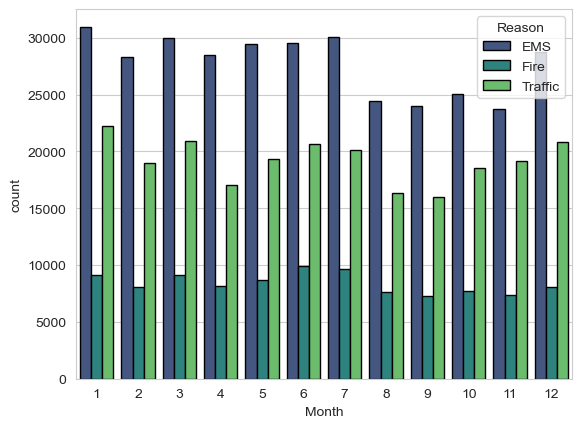

In [70]:
sns.countplot(x='Month', hue='Reason', data=df, palette='viridis')

Now create a gropuby object called byMonth, group the DataFrame by the month column. Use .count() for aggregation. Use .head() method on the returned DataFrame.

In [72]:
df.groupby('Month').count().head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


Created a simple plot off of the dataframe indicating the count of calls per month

In [73]:
byMonth = df.groupby('Month').count()

<Axes: xlabel='Month'>

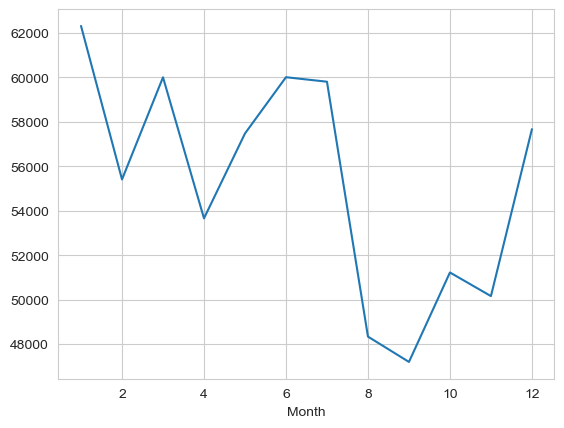

In [74]:
byMonth['twp'].plot()

Use seaborn's .lmplot() to create a linear fit on the number of calls per month. Reset the index to a column

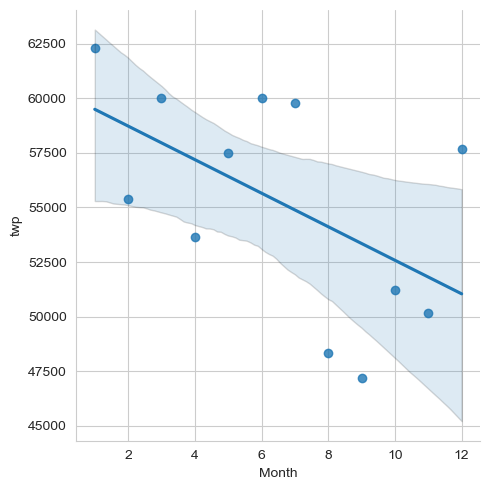

In [76]:
sns.lmplot(data=byMonth.reset_index(), x='Month', y='twp')

Create a new column 'Date' that contains the date from the timeStamp column. Use .apply() along with the .date() method.

In [77]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

Use .groupby() in Date column with .count() aggregate and create a plot of counts of 911 calls.

In [78]:
byDate = df.groupby('Date').count()

<Axes: xlabel='Date', ylabel='e'>

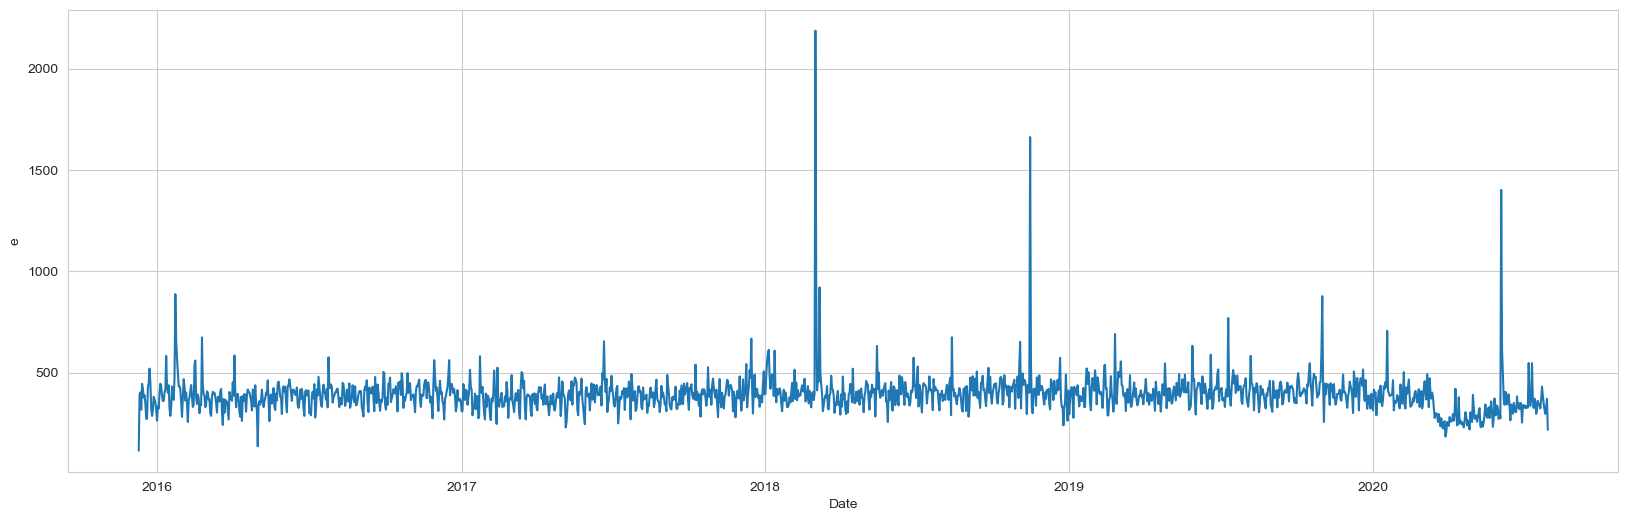

In [87]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='Date',y='e', data=byDate)

Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

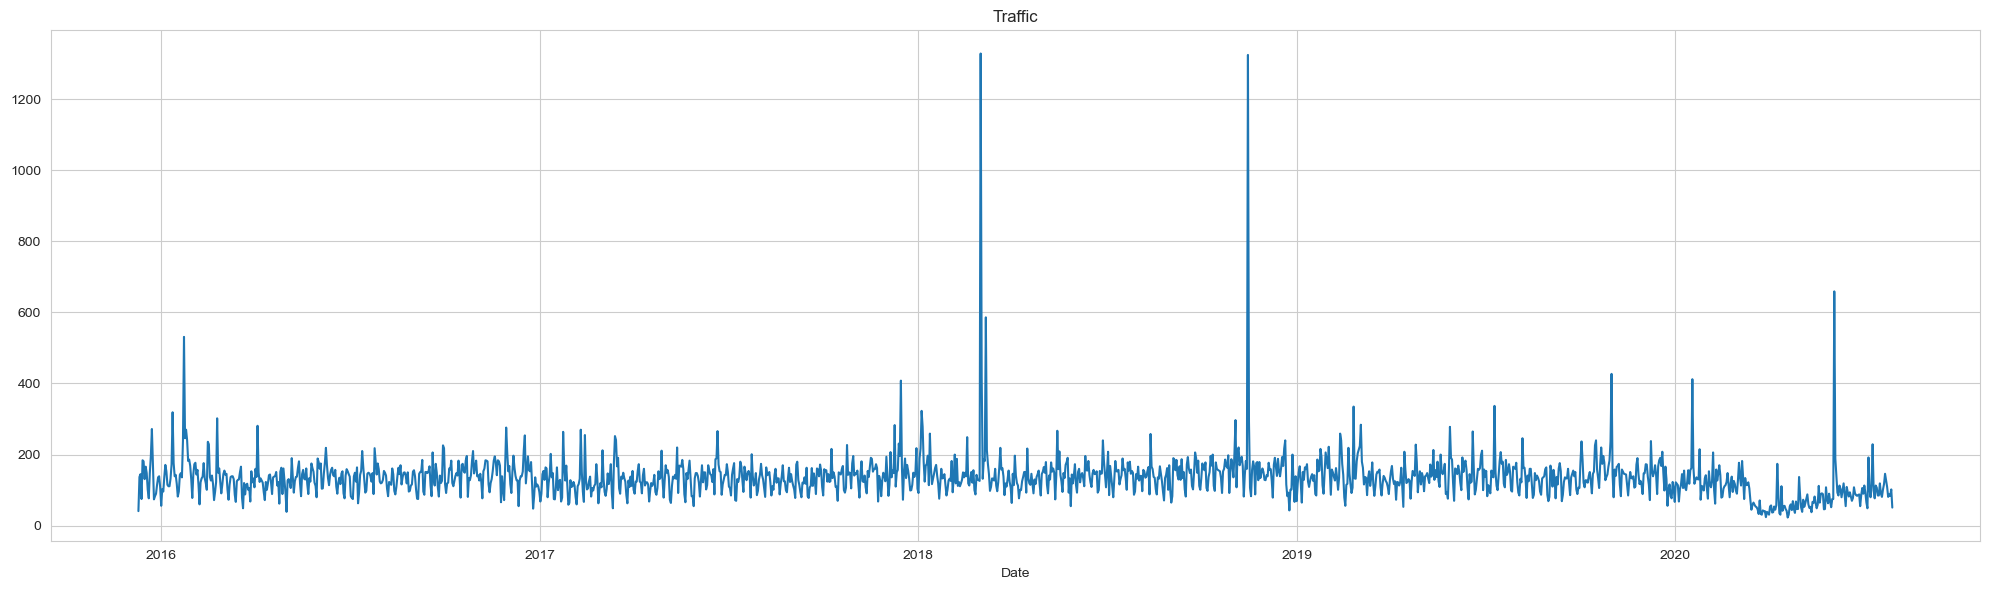

In [89]:
plt.figure(figsize=(20, 6))
df[df['Reason'] == 'Traffic'].groupby('Date').count()['e'].plot()
plt.title('Traffic')
plt.tight_layout()

Text(0.5, 1.0, 'Fire')

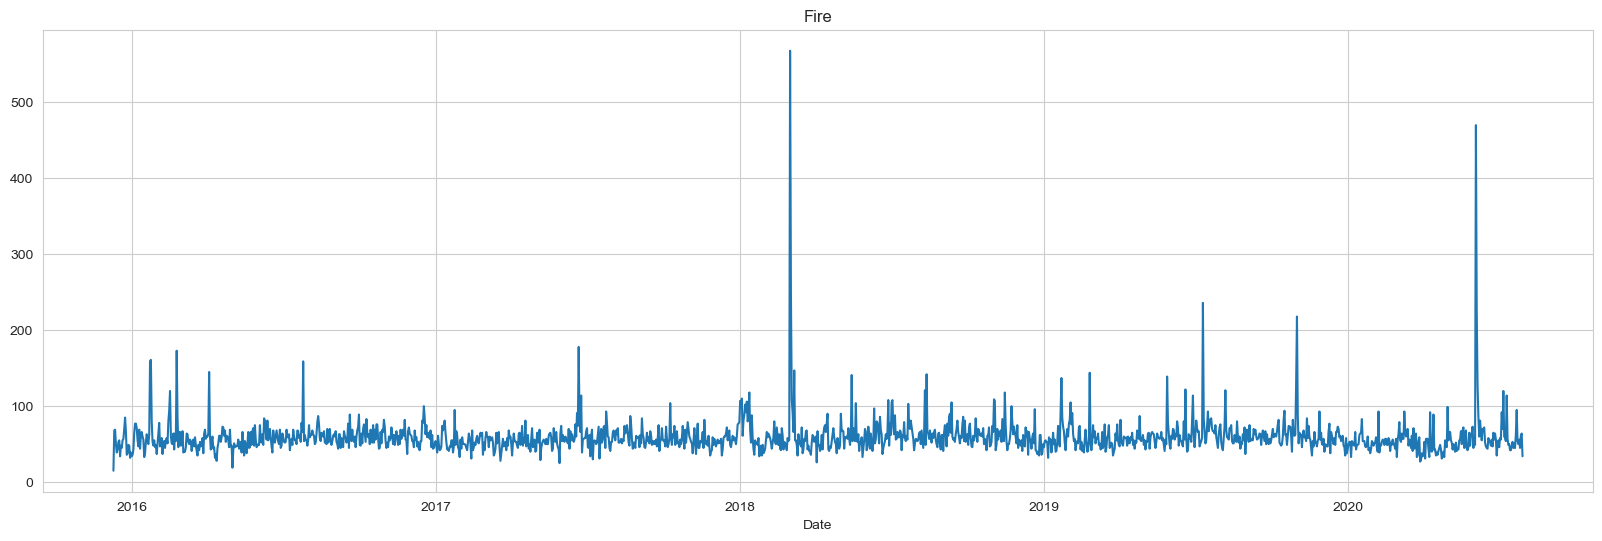

In [90]:
plt.figure(figsize=(20, 6))
df[df['Reason'] == 'Fire'].groupby('Date').count()['e'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

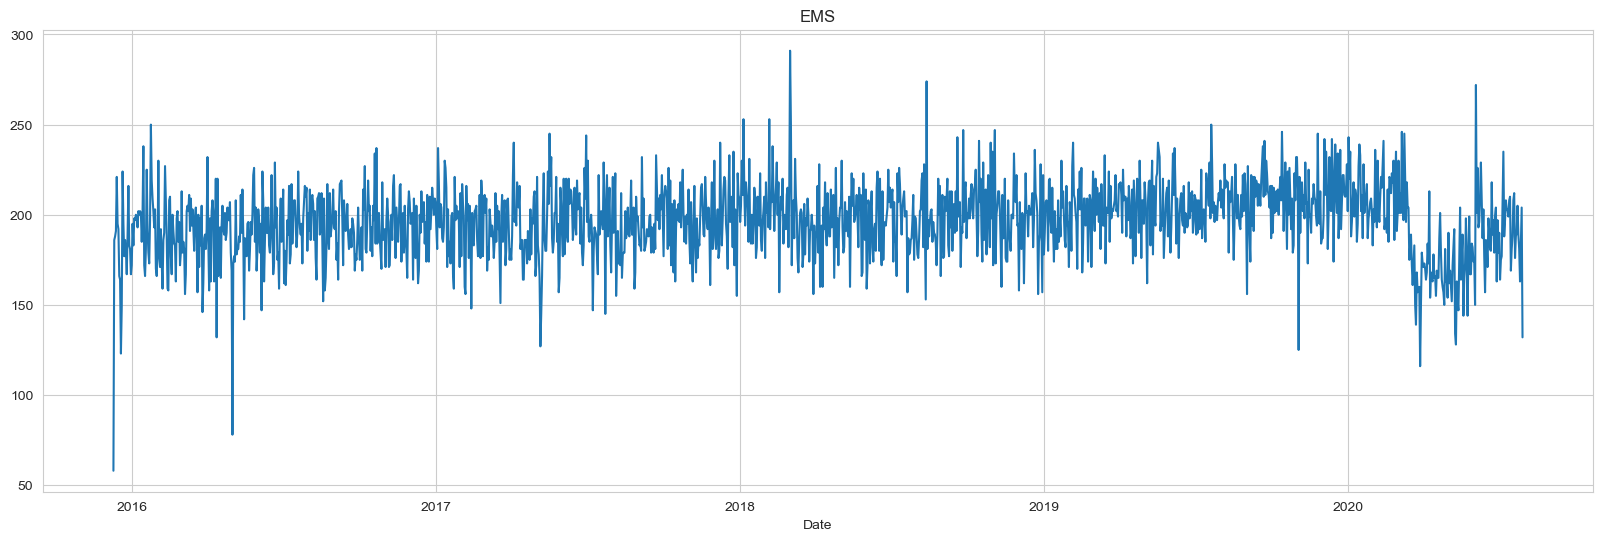

In [91]:
plt.figure(figsize=(20, 6))
df[df['Reason'] == 'EMS'].groupby('Date').count()['e'].plot()
plt.title('EMS')

Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.

In [92]:
grouped = df.groupby(['Day of week', 'Hour'])
counts = grouped.size()
unstacked = counts.unstack('Hour')
unstacked.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


** Now create a HeatMap using this new DataFrame. **

<Axes: xlabel='Hour', ylabel='Day of week'>

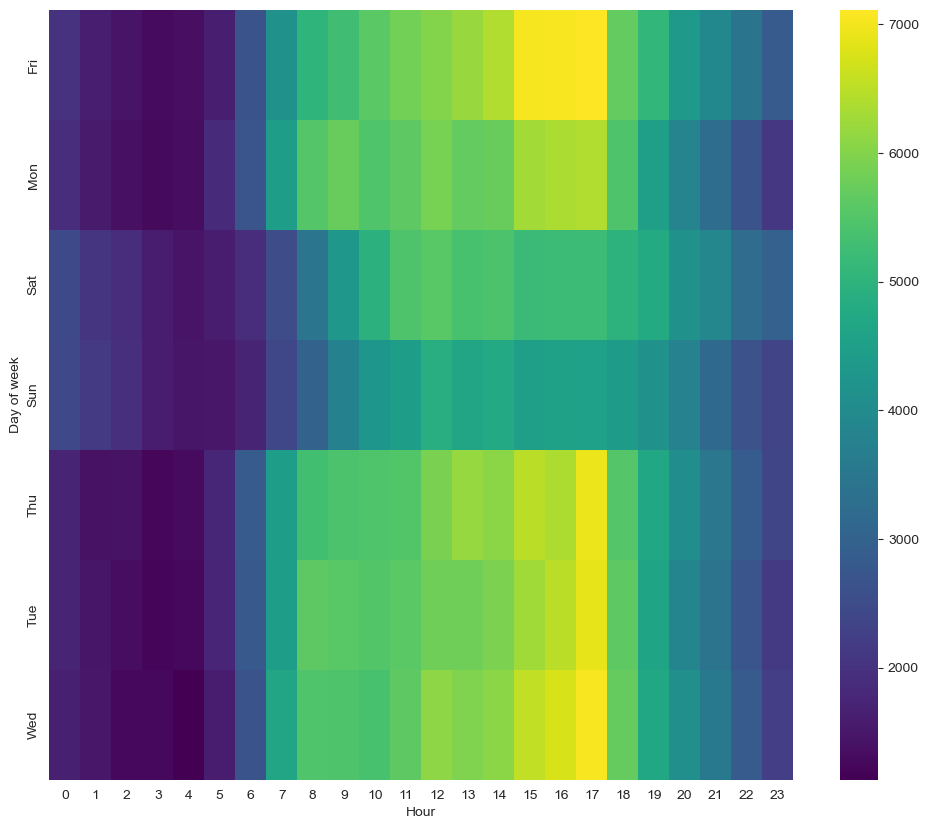

In [97]:
plt.figure(figsize=(12, 10))
sns.heatmap(unstacked, cmap='viridis')

Created a clustermap using this DataFrame.

<Figure size 2000x2000 with 0 Axes>

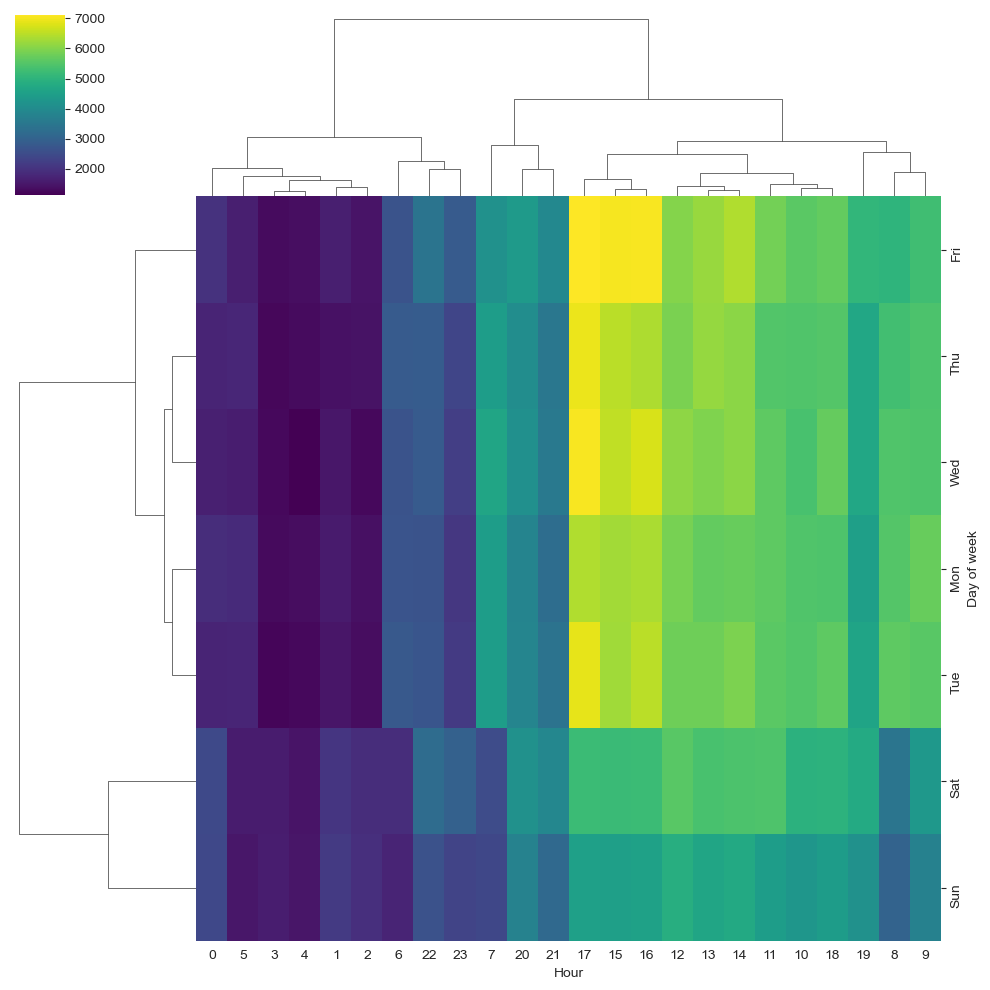

In [95]:
plt.figure(figsize=(20, 20))
sns.clustermap(unstacked,cmap='viridis')

Repeated these same plots and operations, for a DataFrame that shows the Month as the column

In [98]:
grouped_m = df.groupby(['Day of week', 'Month'])
counts_m = grouped_m.size()
unstacked_m = counts_m.unstack('Month')
unstacked_m.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<Axes: xlabel='Month', ylabel='Day of week'>

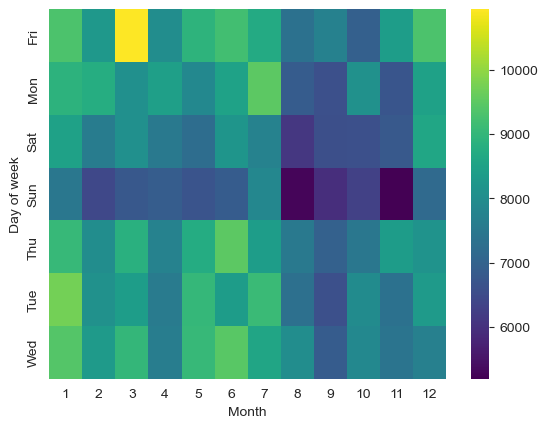

In [99]:
sns.heatmap(unstacked_m, cmap='viridis')

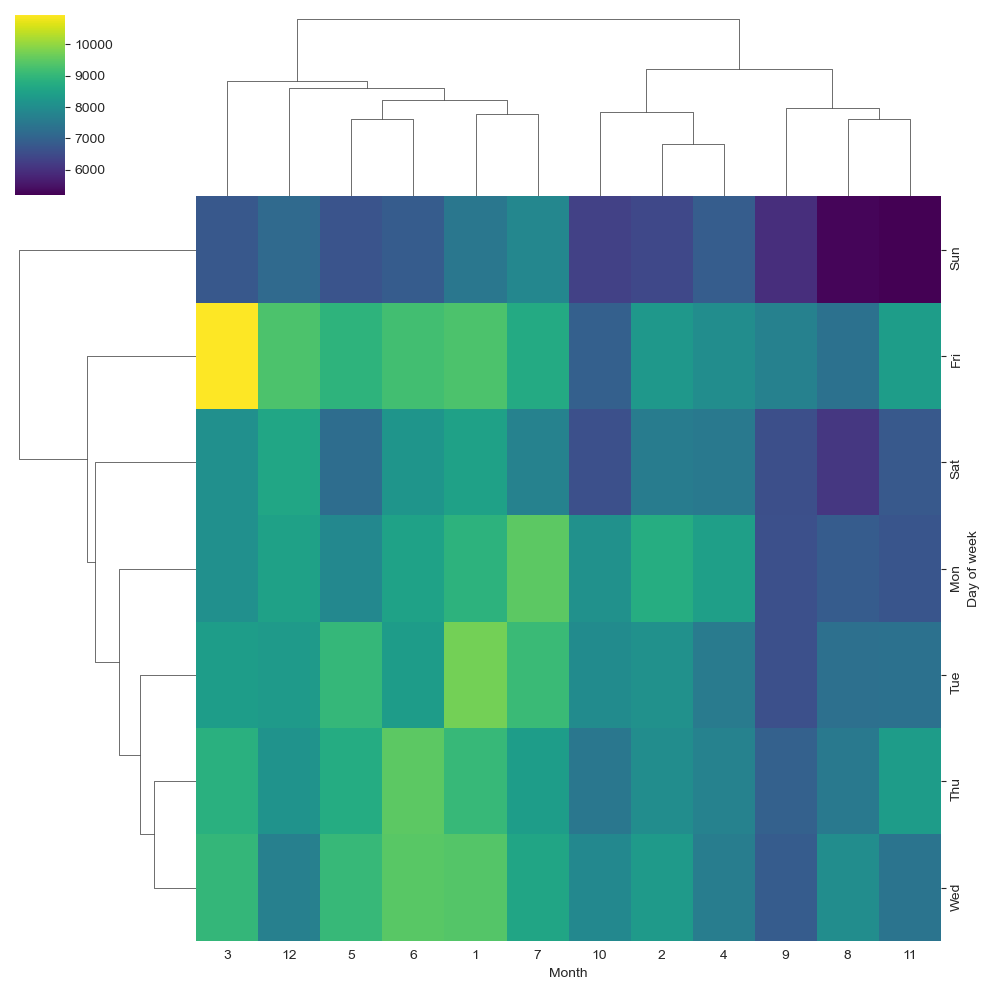

In [100]:
sns.clustermap(unstacked_m, cmap='viridis')